In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import sys

In [2]:
# Config
models = ["GPT-o1", "Llama3-8B", "Qwen-14B"]
DATASETS = ["camperplus", "fish&chips", "grocery", "planningpoker", "recycling", "school", "sports", "supermarket", "ticket"]

# Determine project root
cwd = Path.cwd()
project_root = Path("/Users/rexchou/Documents/GitHub/thesis_github")

# Create output folder
output_dir = project_root / "output" / "experiment" / "boxplot_picture"
output_dir.mkdir(parents=True, exist_ok=True)

In [3]:
# Collect all data
def collect_data(experiment_type):
    df_all = pd.DataFrame({
        "Dataset": pd.Series(dtype="str"),
        "Model": pd.Series(dtype="str"),
        "Run": pd.Series(dtype="int"),
        f"F-0.5 Score": pd.Series(dtype="float"),
        f"F-2 Score": pd.Series(dtype="float"),
    })

    for model in models:
        for dataset in DATASETS:
            file_path = project_root / f"output/{experiment_type}/{model}/{dataset}/experiment_results.xlsx"
            if file_path.exists():
                df2 = pd.read_excel(file_path)
                df2_tidy = pd.DataFrame({
                    "Dataset": dataset,
                    "Model": model,
                    "Run": range(1, len(df2) + 1),
                    f"F-0.5 Score": df2["F-0.5"],
                    f"F-2 Score": df2["F-2"],
                })
                df_all = pd.concat([df_all, df2_tidy], ignore_index=True)
            else:
                print(f"⚠️ File not found: {file_path}")
    return df_all

# Class Boxplot

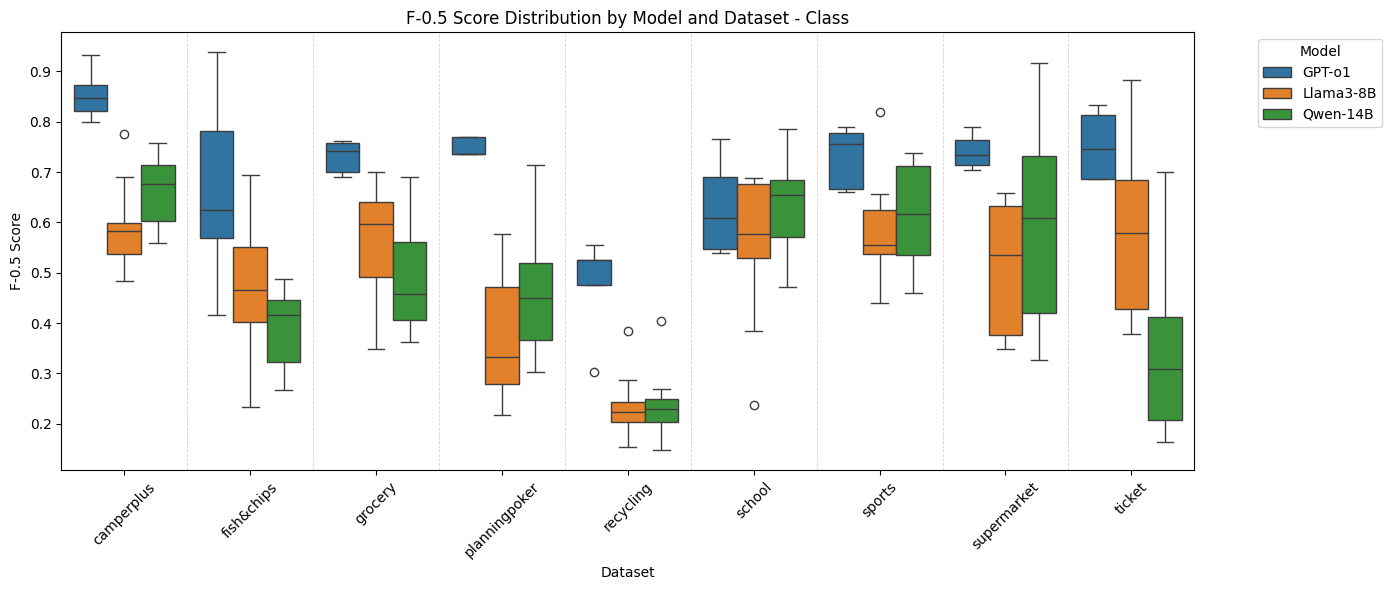

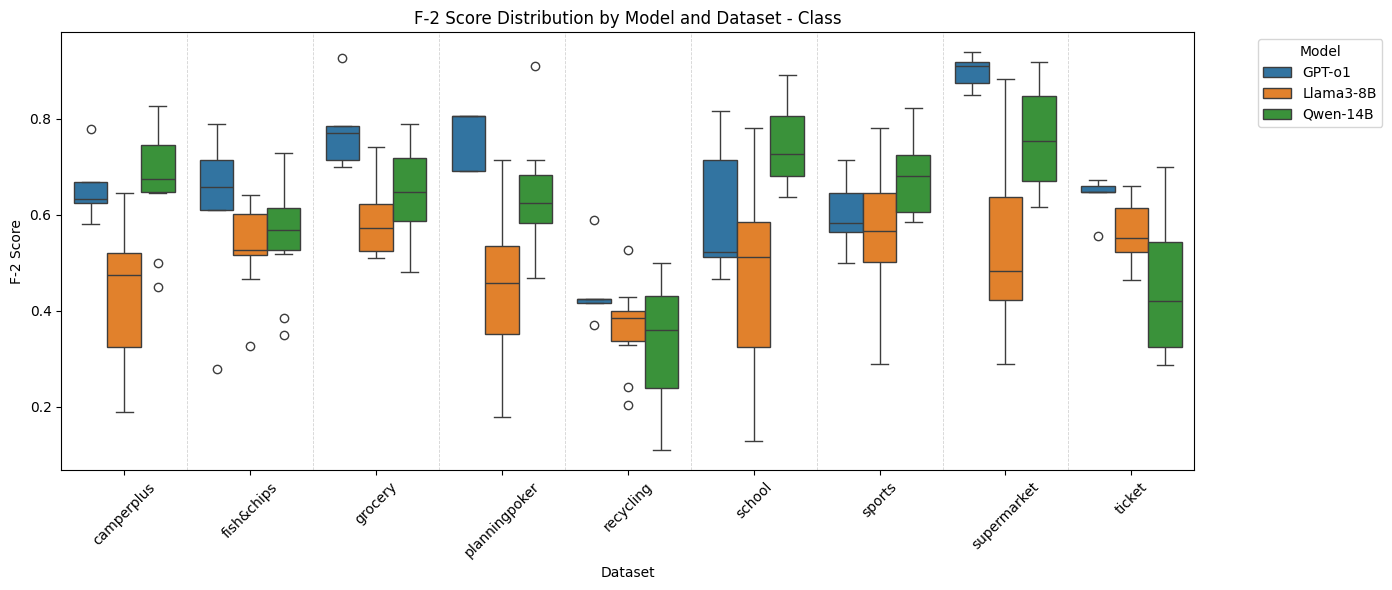

In [4]:
experiment_type = "class"
df_class = collect_data(experiment_type=experiment_type)

# Create the box plot
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_class, x="Dataset", y=f"F-0.5 Score", hue="Model")
for i in range(1, len(ax.get_xticks())):
    ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=0.6)

plt.title(f"F-0.5 Score Distribution by Model and Dataset - {experiment_type.capitalize()}")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_class, x="Dataset", y=f"F-2 Score", hue="Model")
for i in range(1, len(ax.get_xticks())):
    ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=0.6)

plt.title(f"F-2 Score Distribution by Model and Dataset - {experiment_type.capitalize()}")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Association Boxplot

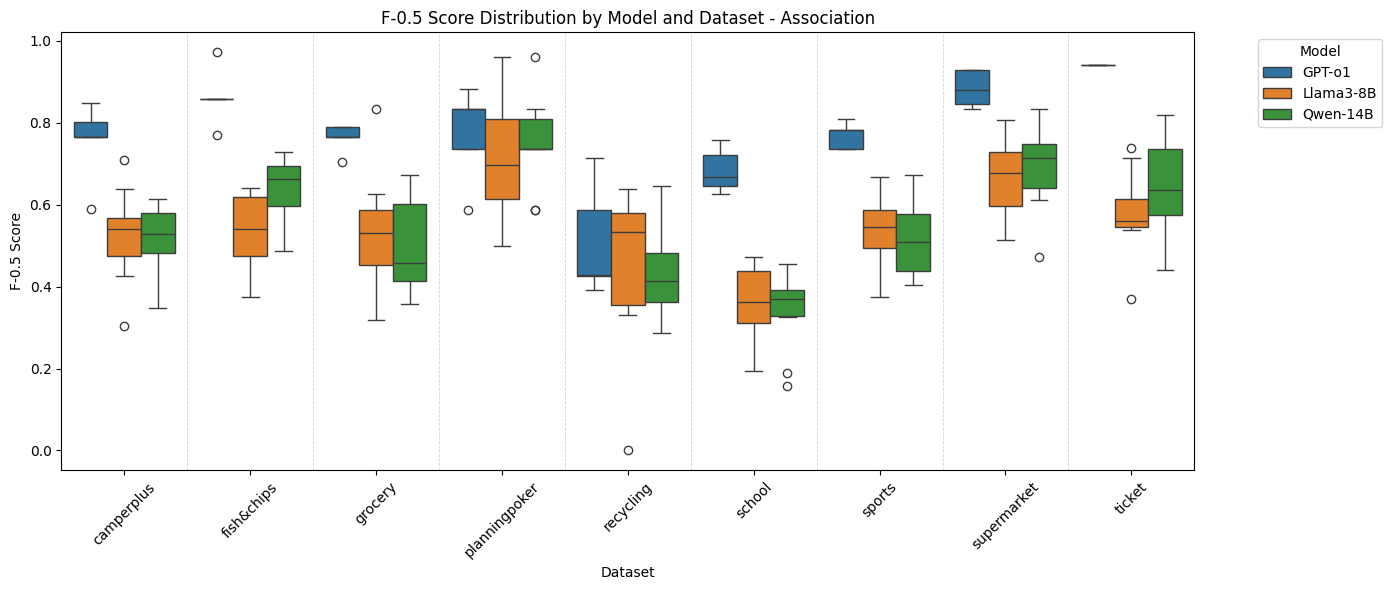

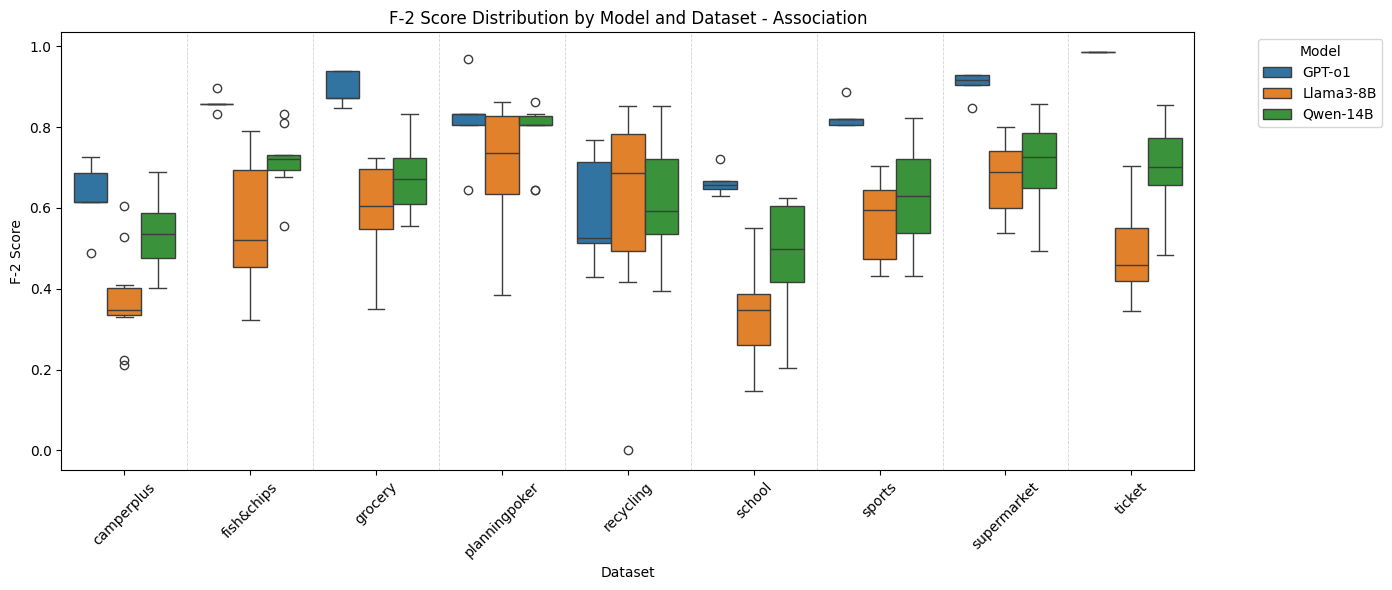

In [5]:
experiment_type = "association"
df_class = collect_data(experiment_type=experiment_type)

# Create the box plot
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_class, x="Dataset", y=f"F-0.5 Score", hue="Model")
for i in range(1, len(ax.get_xticks())):
    ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=0.6)

plt.title(f"F-0.5 Score Distribution by Model and Dataset - {experiment_type.capitalize()}")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_class, x="Dataset", y=f"F-2 Score", hue="Model")
for i in range(1, len(ax.get_xticks())):
    ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=0.6)

plt.title(f"F-2 Score Distribution by Model and Dataset - {experiment_type.capitalize()}")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()